In [270]:
import numpy as np
import pandas as pd
from networkx import nx
import matplotlib.pyplot as plt

In [10]:
ACTIVITY_TOPICS_NUM = 12
INTERESTS_TOPICS_NUM = 13

## Выбор трешхолда для определения интересов/активностей пользователя

### Трешхолд по значению

In [306]:
df = pd.read_csv('users_activities_groups.csv')

In [307]:
df = df.drop(columns=['Unnamed: 0'])

In [308]:
df = df.drop_duplicates(subset=['user_id'])

In [309]:
df

,user_id,posts_reposts_0,posts_reposts_1,posts_reposts_2,posts_reposts_3,posts_reposts_4,posts_reposts_5,posts_reposts_6,posts_reposts_7,posts_reposts_8,...,groups_3,groups_4,groups_5,groups_6,groups_7,groups_8,groups_9,groups_10,groups_11,groups_12
0,17489295,0.053998,0.040320,0.061113,0.062024,0.053151,0.067862,0.314564,0.059733,0.077446,...,NaN,0.456763,NaN,NaN,NaN,0.017124,NaN,NaN,NaN,NaN
1,91020,0.058680,0.043816,0.066413,0.067403,0.057760,0.073747,0.255121,0.064913,0.084162,...,NaN,0.629385,NaN,NaN,NaN,NaN,0.041771,NaN,NaN,NaN
2,17039363,0.064255,0.047979,0.072723,0.073806,0.063248,0.080753,0.184357,0.071080,0.092158,...,NaN,0.581425,NaN,NaN,NaN,NaN,0.018878,NaN,NaN,0.038319
3,2430764,0.064255,0.047979,0.072723,0.073806,0.063248,0.080753,0.184357,0.071080,0.092158,...,NaN,0.647599,NaN,NaN,NaN,0.011934,NaN,NaN,NaN,NaN
4,76546053,0.064255,0.047979,0.072723,0.073806,0.063248,0.080753,0.184357,0.071080,0.092158,...,0.064162,0.354159,NaN,NaN,NaN,NaN,0.049147,NaN,NaN,0.058909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41623,8866242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.507179,NaN,NaN,NaN,NaN,0.034019,NaN,NaN,NaN
41625,158878055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.743281,NaN,NaN,NaN,0.011464,NaN,NaN,NaN,NaN
41626,494898573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012684,0.242628,0.011198,0.012535,0.012607,0.027268,0.015494,NaN,0.015366,0.014789
41630,531218345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018019,0.194452,0.015902,0.017802,0.017906,0.039222,0.022005,0.012741,0.021856,0.021008


In [42]:
df.describe()

,user_id,posts_reposts_0,posts_reposts_1,posts_reposts_2,posts_reposts_3,posts_reposts_4,posts_reposts_5,posts_reposts_6,posts_reposts_7,posts_reposts_8,...,groups_3,groups_4,groups_5,groups_6,groups_7,groups_8,groups_9,groups_10,groups_11,groups_12
count,2.899700e+04,12662.000000,12629.000000,12666.000000,12666.000000,12659.000000,12665.000000,12666.000000,12666.000000,12666.000000,...,16109.000000,28969.000000,13931.000000,15128.000000,13952.000000,24821.000000,21583.000000,11151.000000,17322.000000,18740.000000
mean,1.519937e+08,0.053793,0.040219,0.078817,0.062090,0.052929,0.067740,0.273450,0.072546,0.079582,...,0.022304,0.348638,0.016032,0.018782,0.017757,0.032329,0.029238,0.015907,0.025179,0.028469
std,1.630975e+08,0.010550,0.007718,0.025033,0.011388,0.010330,0.012737,0.067959,0.029020,0.013136,...,0.017553,0.199239,0.005609,0.008237,0.004845,0.022652,0.021679,0.017196,0.018267,0.035229
min,1.450000e+02,0.010021,0.010197,0.019357,0.014267,0.010824,0.014527,0.184357,0.018920,0.024531,...,0.010021,0.012663,0.010186,0.010462,0.010523,0.010025,0.010117,0.010001,0.010280,0.010058
25%,1.199566e+07,0.050002,0.037337,0.066410,0.057435,0.049218,0.062840,0.184357,0.059733,0.071716,...,0.015802,0.194379,0.013946,0.015612,0.015701,0.015508,0.019298,0.012741,0.017064,0.018423
50%,9.807551e+07,0.058680,0.043816,0.072723,0.067403,0.057760,0.073747,0.255121,0.064913,0.084162,...,0.018019,0.322116,0.015902,0.017802,0.017906,0.030361,0.022005,0.012741,0.021856,0.021008
75%,2.318478e+08,0.064255,0.047979,0.072723,0.073806,0.063248,0.080753,0.318241,0.071080,0.092158,...,0.020940,0.537155,0.015902,0.017802,0.017906,0.039221,0.033470,0.014819,0.025332,0.024457
max,6.384389e+08,0.150882,0.065714,0.300299,0.142658,0.082667,0.081034,0.782891,0.378167,0.277667,...,0.362040,0.849550,0.125496,0.138170,0.118750,0.433773,0.346091,0.362476,0.392412,0.415625


Тактика: отделить интересы и активности, посчитать для этих двух групп средний процентиль.

In [236]:
activity_10 = []
activity_25 = []
activity_50 = []
activity_75 = []
activity_90 = []

for i in range(ACTIVITY_TOPICS_NUM):
    df_temp = df.describe()[f'posts_reposts_{i}']
    activity_10.append(df.quantile(.1)[f'posts_reposts_{i}'])
    activity_25.append(df_temp.iloc[4])
    activity_50.append(df_temp.iloc[5])
    activity_75.append(df_temp.iloc[6])
    activity_90.append(df.quantile(.9)[f'posts_reposts_{i}'])

activity_10_mean = sum(activity_10) / ACTIVITY_TOPICS_NUM
activity_25_mean = sum(activity_25) / ACTIVITY_TOPICS_NUM
activity_50_mean = sum(activity_50) / ACTIVITY_TOPICS_NUM
activity_75_mean = sum(activity_75) / ACTIVITY_TOPICS_NUM
activity_90_mean = sum(activity_90) / ACTIVITY_TOPICS_NUM

In [237]:
interests_10 = []
interests_25 = []
interests_50 = []
interests_75 = []
interests_90 = []

for i in range(INTERESTS_TOPICS_NUM):
    df_temp = df.describe()[f'groups_{i}']
    interests_10.append(df.quantile(.1)[f'groups_{i}'])
    interests_25.append(df_temp.iloc[4])
    interests_50.append(df_temp.iloc[5])
    interests_75.append(df_temp.iloc[6])
    interests_90.append(df.quantile(.9)[f'groups_{i}'])

interests_10_mean = sum(interests_10) / INTERESTS_TOPICS_NUM
interests_25_mean = sum(interests_25) / INTERESTS_TOPICS_NUM
interests_50_mean = sum(interests_50) / INTERESTS_TOPICS_NUM
interests_75_mean = sum(interests_75) / INTERESTS_TOPICS_NUM
interests_90_mean = sum(interests_90) / INTERESTS_TOPICS_NUM

## Построение графа

Количество пользователей

In [228]:
users = list(df['user_id'])
len(users)

28997

Названия вершин

In [82]:
vertices_num = ACTIVITY_TOPICS_NUM + INTERESTS_TOPICS_NUM
activity_vertices = [f'posts_reposts_{i}' for i in range(ACTIVITY_TOPICS_NUM)]
interests_vertices = [f'groups_{i}' for i in range(INTERESTS_TOPICS_NUM)]

vertices_list = activity_vertices + interests_vertices
labels = {i: list(vertices_list)[i] for i in range(len(list(vertices_list)))}

In [ ]:
# adj_matrix_10  graph_10
# adj_matrix_90  graph_90
# adj_matrix     graph (50%)

In [387]:
def get_adj_matrix_advanced():
    adjacency_matrix = [[0 for _ in range(vertices_num)] for _ in range(vertices_num)]
    i = 0
    for v1 in range(vertices_num):
        print('v1 = ' + str(i))
        j = 0
        for v2 in range(vertices_num):
            print('v2 = ' + str(j))
            topics_sum = 0
            for user_id in users:
                df_user = df.loc[df['user_id'] == user_id]
                value_v1 = df_user[vertices_list[v1]].values[0]
                value_v2 = df_user[vertices_list[v2]].values[0]
                if not np.isnan(value_v1) and not np.isnan(value_v2):
                    topics_sum += (value_v1 * value_v2)
            adjacency_matrix[v1][v2] = topics_sum / len(users)
            j += 1
        i += 1
    return adjacency_matrix

In [388]:
adj_matrix_adv = get_adj_matrix_advanced()

v1 = 0
v2 = 0
v2 = 1
v2 = 2
v2 = 3
v2 = 4
v2 = 5
v2 = 6
v2 = 7
v2 = 8
v2 = 9
v2 = 10
v2 = 11
v2 = 12
v2 = 13
v2 = 14
v2 = 15
v2 = 16
v2 = 17
v2 = 18
v2 = 19
v2 = 20
v2 = 21
v2 = 22
v2 = 23
v2 = 24
v1 = 1
v2 = 0
v2 = 1
v2 = 2
v2 = 3
v2 = 4
v2 = 5
v2 = 6
v2 = 7
v2 = 8
v2 = 9
v2 = 10
v2 = 11
v2 = 12
v2 = 13
v2 = 14
v2 = 15
v2 = 16
v2 = 17
v2 = 18
v2 = 19
v2 = 20
v2 = 21
v2 = 22
v2 = 23
v2 = 24
v1 = 2
v2 = 0
v2 = 1
v2 = 2
v2 = 3
v2 = 4
v2 = 5
v2 = 6
v2 = 7
v2 = 8
v2 = 9
v2 = 10
v2 = 11
v2 = 12
v2 = 13
v2 = 14
v2 = 15
v2 = 16
v2 = 17
v2 = 18
v2 = 19
v2 = 20
v2 = 21
v2 = 22
v2 = 23
v2 = 24
v1 = 3
v2 = 0
v2 = 1
v2 = 2
v2 = 3
v2 = 4
v2 = 5
v2 = 6
v2 = 7
v2 = 8
v2 = 9
v2 = 10
v2 = 11
v2 = 12
v2 = 13
v2 = 14
v2 = 15
v2 = 16
v2 = 17
v2 = 18
v2 = 19
v2 = 20
v2 = 21
v2 = 22
v2 = 23
v2 = 24
v1 = 4
v2 = 0
v2 = 1
v2 = 2
v2 = 3
v2 = 4
v2 = 5
v2 = 6
v2 = 7
v2 = 8
v2 = 9
v2 = 10
v2 = 11
v2 = 12
v2 = 13
v2 = 14
v2 = 15
v2 = 16
v2 = 17
v2 = 18
v2 = 19
v2 = 20
v2 = 21
v2 = 22
v2 = 23
v2 = 24
v1 = 5
v2 = 0
v

In [239]:
def get_adj_matrix(treshold_activity, treshold_interests):
    adjacency_matrix = [[0 for _ in range(vertices_num)] for _ in range(vertices_num)]
    
    for user_id in users:
        for v1 in range(vertices_num):
            for v2 in range(vertices_num):
                df_user = df.loc[df['user_id'] == user_id]
                treshold_1 = treshold_activity if v1 < 12 else treshold_interests
                treshold_2 = treshold_activity if v2 < 12 else treshold_interests
                if df_user[vertices_list[v1]].values[0] >= treshold_1 and \
                df_user[vertices_list[v2]].values[0] >= treshold_2:
                    adjacency_matrix[v1][v2] += 1
    return adjacency_matrix

In [250]:
def get_graph_from_matrix(adj_matrix):
    return nx.from_numpy_matrix(np.matrix(adj_matrix))

In [251]:
def get_edge_labels(graph):
    weights = [graph.get_edge_data(v1, v2)['weight'] if 
               graph.get_edge_data(v1, v2)['weight'] else 0 
               for v1, v2 in graph.edges]
    edge_labels = {edge: str(weight) for weight, edge in zip(weights, graph.edges)}
    return edge_labels

In [232]:
def show_graph(graph, labels, edge_labels, size=(10, 10), layout=nx.spring_layout(graph, k=10)):
    plt.figure(figsize = size)
    pos = layout
    
    edges, weights_1 = zip(*nx.get_edge_attributes(graph,'weight').items())
    
    nx.draw(graph, pos, node_color='b', edgelist=edges, edge_color=weights_1, width=2.0, edge_cmap=plt.cm.Blues)
    edge_cmap=plt.cm.Blues
    nx.draw_networkx_labels(graph, pos, labels, font_size=10)
#     nx.draw_networkx_edge_labels(graph, pos)
    plt.show()

In [390]:
graph_adv = get_graph_from_matrix(adj_matrix_adv)

In [417]:
len(adj_matrix_adv[24])

25

In [459]:
adj_matrix_adv_2 = []
for i in range(len(adj_matrix_adv)):
    adj_matrix_adv_2.append([])
    for j in range(len(adj_matrix_adv[i])):
        adj_matrix_adv_2[i].append(pow(adj_matrix_adv[i][j], 0.5)) 

In [460]:
graph_adv_2 = get_graph_from_matrix(adj_matrix_adv_2)

In [436]:
adj_matrix_adv_3 = []
for i in range(len(adj_matrix_adv)):
    adj_matrix_adv_3.append([])
    for j in range(len(adj_matrix_adv[i])):
        if i <= 12 and j <= 12:
            adj_matrix_adv_3[i].append(pow(adj_matrix_adv[i][j], 0.33))
        else:
            adj_matrix_adv_3[i].append(adj_matrix_adv[i][j]) 

In [437]:
graph_adv_3 = get_graph_from_matrix(adj_matrix_adv_3)

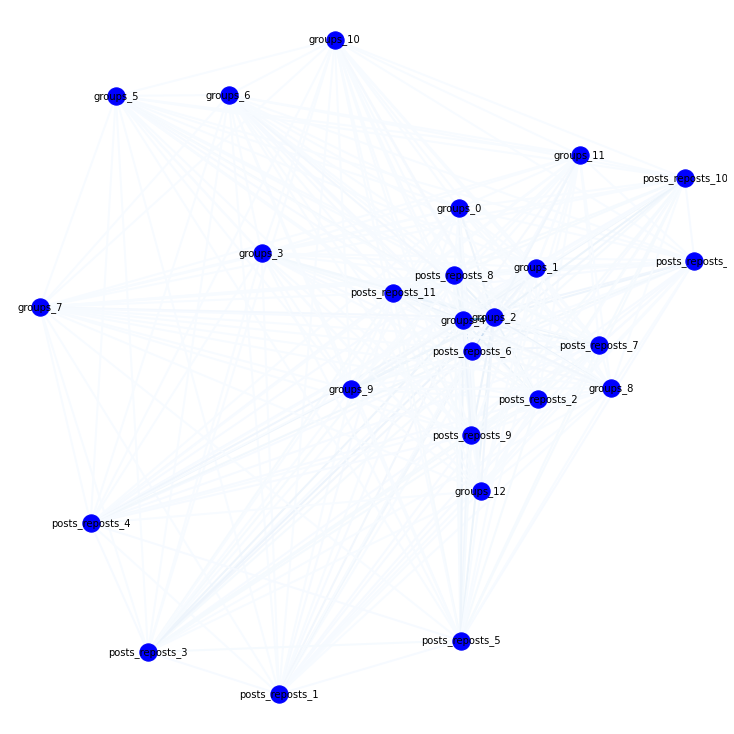

In [391]:
show_graph(graph_adv, labels, get_edge_labels(graph_adv))

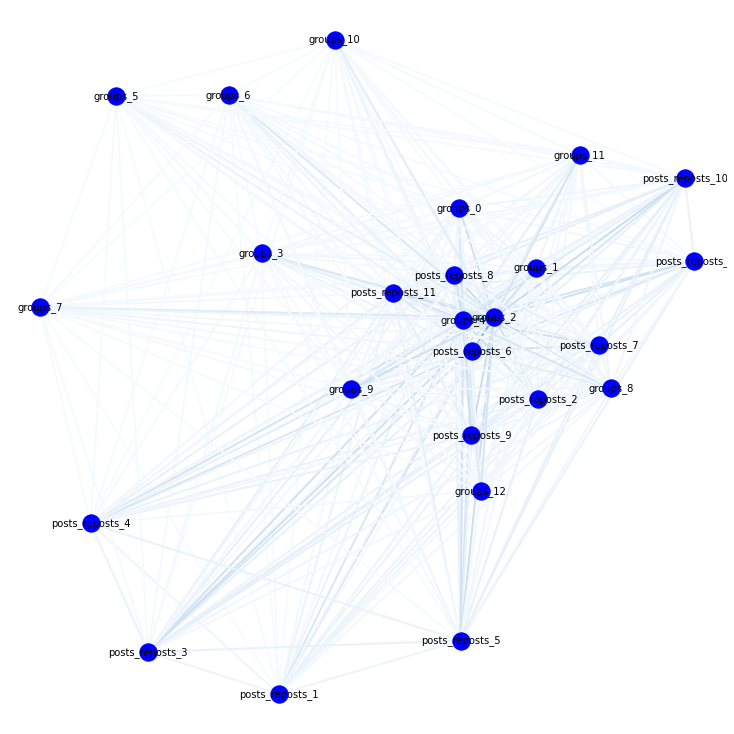

In [461]:
show_graph(graph_adv_2, labels, get_edge_labels(graph_adv_2))

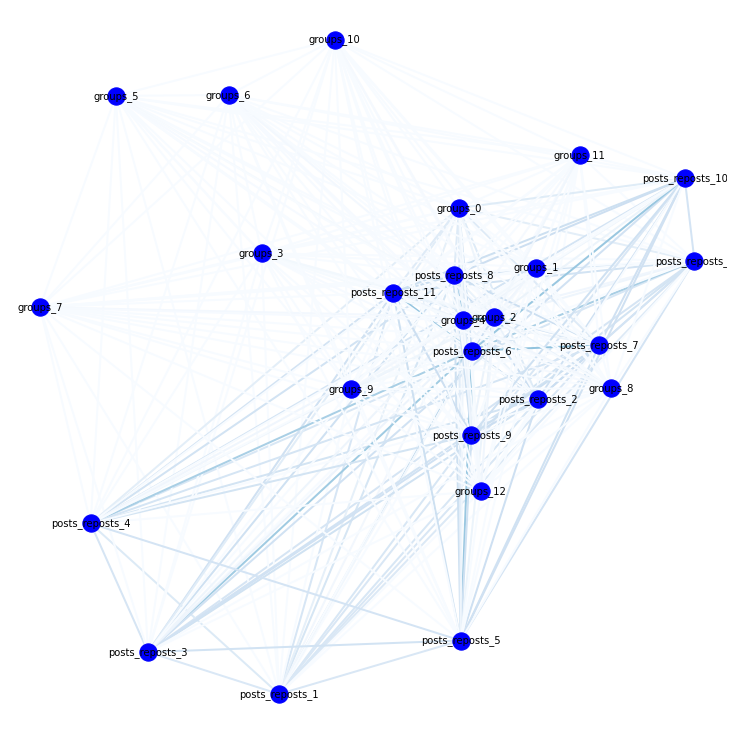

In [432]:
show_graph(graph_adv_3, labels, get_edge_labels(graph_adv_3))

In [241]:
graph_10 = get_graph_from_matrix(adj_matrix_10)

In [231]:
graph_90 = get_graph_from_matrix(adj_matrix_90)

In [99]:
graph = get_graph_from_matrix(adj_matrix)

### Граф с трешхолдом = 10%

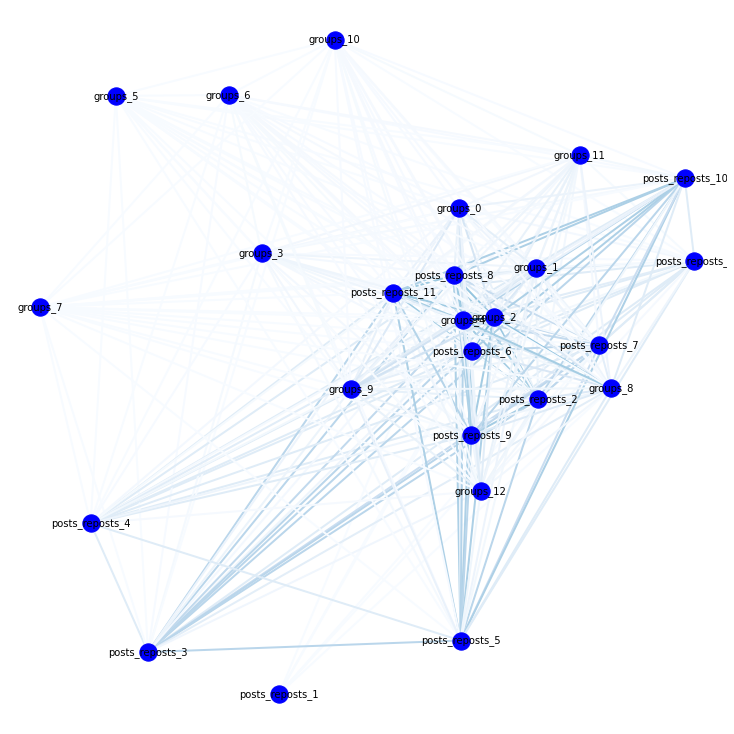

In [243]:
show_graph(graph_10, labels, get_edge_labels(graph_10))

### Граф с трешхолдом = 90%

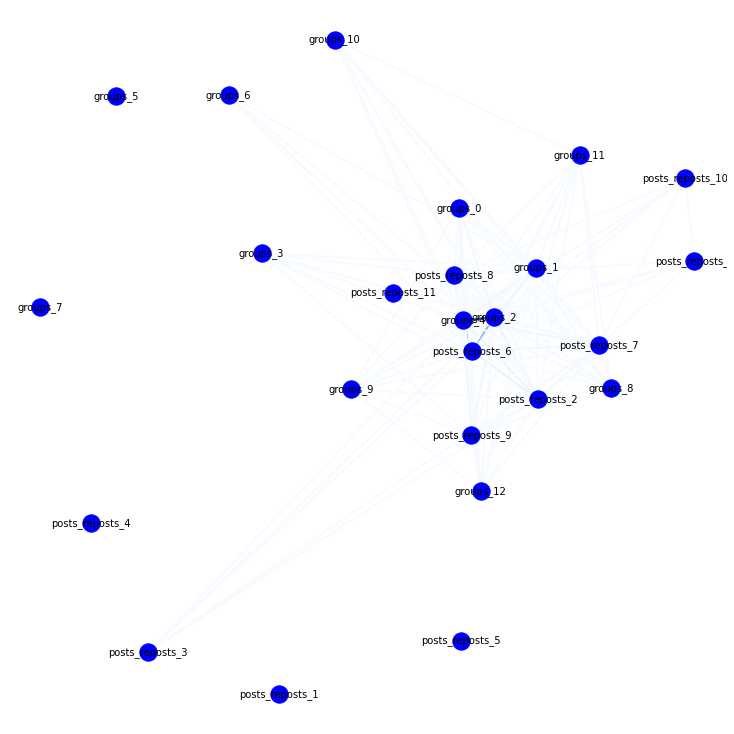

In [234]:
show_graph(graph_90, labels, get_edge_labels(graph_90))

### Граф с трешхолдом = 50%

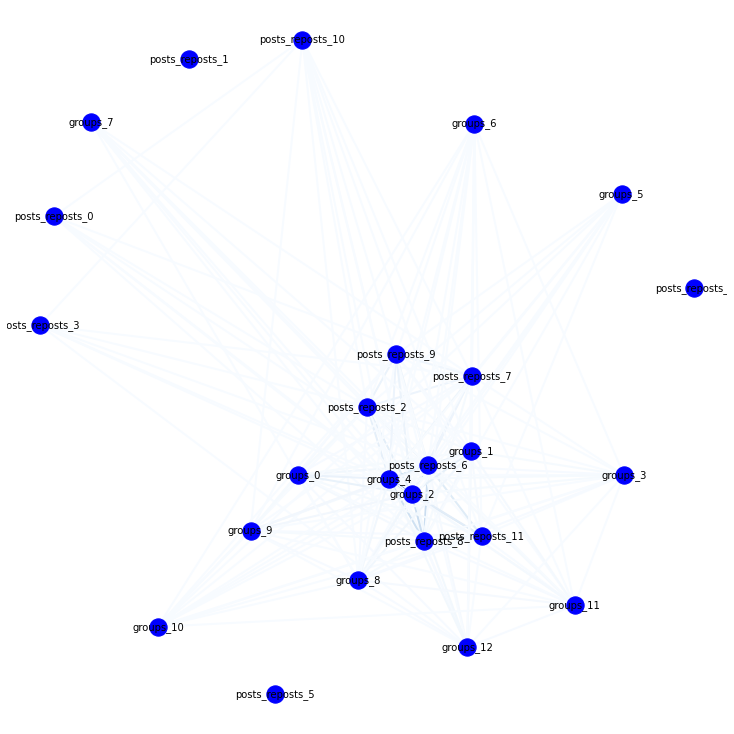

In [206]:
show_graph(graph, labels, get_edge_labels(graph))

# Трешхолд по количеству

In [19]:
INTERESTS_TRESHOLD = 3
ACTIVITY_TRESHOLD = 3

In [155]:
df

,user_id,posts_reposts_0,posts_reposts_1,posts_reposts_2,posts_reposts_3,posts_reposts_4,posts_reposts_5,posts_reposts_6,posts_reposts_7,posts_reposts_8,...,groups_3,groups_4,groups_5,groups_6,groups_7,groups_8,groups_9,groups_10,groups_11,groups_12
0,17489295,0.053998,0.040320,0.061113,0.062024,0.053151,0.067862,0.314564,0.059733,0.077446,...,NaN,0.456763,NaN,NaN,NaN,0.017124,NaN,NaN,NaN,NaN
1,91020,0.058680,0.043816,0.066413,0.067403,0.057760,0.073747,0.255121,0.064913,0.084162,...,NaN,0.629385,NaN,NaN,NaN,NaN,0.041771,NaN,NaN,NaN
2,17039363,0.064255,0.047979,0.072723,0.073806,0.063248,0.080753,0.184357,0.071080,0.092158,...,NaN,0.581425,NaN,NaN,NaN,NaN,0.018878,NaN,NaN,0.038319
3,2430764,0.064255,0.047979,0.072723,0.073806,0.063248,0.080753,0.184357,0.071080,0.092158,...,NaN,0.647599,NaN,NaN,NaN,0.011934,NaN,NaN,NaN,NaN
4,76546053,0.064255,0.047979,0.072723,0.073806,0.063248,0.080753,0.184357,0.071080,0.092158,...,0.064162,0.354159,NaN,NaN,NaN,NaN,0.049147,NaN,NaN,0.058909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41623,8866242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.507179,NaN,NaN,NaN,NaN,0.034019,NaN,NaN,NaN
41625,158878055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.743281,NaN,NaN,NaN,0.011464,NaN,NaN,NaN,NaN
41626,494898573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012684,0.242628,0.011198,0.012535,0.012607,0.027268,0.015494,NaN,0.015366,0.014789
41630,531218345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018019,0.194452,0.015902,0.017802,0.017906,0.039222,0.022005,0.012741,0.021856,0.021008


In [254]:
top_interests = [[] for _ in range(INTERESTS_TRESHOLD)]
top_activities = [[] for _ in range(ACTIVITY_TRESHOLD)]

top_interests_interpretation = [[] for _ in range(INTERESTS_TRESHOLD)]
top_activities_interpretation = [[] for _ in range(ACTIVITY_TRESHOLD)]


for i in range(len(users)):
    df_part = df.iloc[i].drop('user_id')
    activities = df_part.iloc[1:13]
    interests = df_part.iloc[13:]
    
    # interests
    n = len(interests.nlargest(INTERESTS_TRESHOLD))
    n = INTERESTS_TRESHOLD if n > INTERESTS_TRESHOLD else n
    
    for j in range(n):
        top_interests[j].append(interests.nlargest(INTERESTS_TRESHOLD)[j])
        top_interests_interpretation[j].append(interests.nlargest(INTERESTS_TRESHOLD).index[j])
        
    for j in range(n, INTERESTS_TRESHOLD):
        top_interests[j].append('nan')
        top_interests_interpretation[j].append('nan')
    
    
    # activities
    n = len(activities.nlargest(ACTIVITY_TRESHOLD))
    n = ACTIVITY_TRESHOLD if n > ACTIVITY_TRESHOLD else n
    
    for j in range(n):
        top_activities[j].append(activities.nlargest(ACTIVITY_TRESHOLD)[j])
        top_activities_interpretation[j].append(activities.nlargest(ACTIVITY_TRESHOLD).index[j])
        
    for j in range(n, ACTIVITY_TRESHOLD):
        top_activities[j].append('nan')
        top_activities_interpretation[j].append('nan')

In [169]:
new_df = pd.DataFrame()
new_df['user_id'] = df['user_id']
new_df['group_top_1'] = top_interests[0]
new_df['group_top_1_interpretation'] = top_interests_interpretation[0]
new_df['group_top_2'] = top_interests[1]
new_df['group_top_2_interpretation'] = top_interests_interpretation[1]
new_df['group_top_3'] = top_interests[2]
new_df['group_top_3_interpretation'] = top_interests_interpretation[2]

new_df['post_top_1'] = top_activities[0]
new_df['post_top_1_interpretation'] = top_activities_interpretation[0]
new_df['post_top_2'] = top_activities[1]
new_df['post_top_2_interpretation'] = top_activities_interpretation[1]
new_df['post_top_3'] = top_activities[2]
new_df['post_top_3_interpretation'] = top_activities_interpretation[2]

In [171]:
len(top_1_inter_posts)

28997

In [172]:
users_dict = {}
for i in range(users_num):
    items = []
    if top_1_inter_groups[i] != 'nan':
        items.append(top_1_inter_groups[i])
    if top_2_inter_groups[i] != 'nan':
        items.append(top_2_inter_groups[i])
    if top_3_inter_groups[i] != 'nan':
        items.append(top_3_inter_groups[i])
    if top_1_inter_posts[i] != 'nan':
        items.append(top_1_inter_posts[i])
    if top_2_inter_posts[i] != 'nan':
        items.append(top_2_inter_posts[i])
    if top_2_inter_posts[i] != 'nan':
        items.append(top_2_inter_posts[i])
    users_dict.update({users[i]: items})

In [170]:
new_df

,user_id,group_top_1,group_top_1_interpretation,group_top_2,group_top_2_interpretation,group_top_3,group_top_3_interpretation,post_top_1,post_top_1_interpretation,post_top_2,post_top_2_interpretation,post_top_3,post_top_3_interpretation
0,17489295,0.456763,groups_4,0.445337,groups_2,0.017124,groups_8,0.314564,posts_reposts_6,0.077446,posts_reposts_8,0.076363,posts_reposts_11
1,91020,0.629385,groups_4,0.229708,groups_2,0.041771,groups_9,0.255121,posts_reposts_6,0.084162,posts_reposts_8,0.082985,posts_reposts_11
2,17039363,0.581425,groups_4,0.306561,groups_2,0.038319,groups_12,0.184357,posts_reposts_6,0.092158,posts_reposts_8,0.090869,posts_reposts_11
3,2430764,0.647599,groups_4,0.284162,groups_2,0.011934,groups_8,0.184357,posts_reposts_6,0.092158,posts_reposts_8,0.090869,posts_reposts_11
4,76546053,0.354159,groups_4,0.295301,groups_2,0.092922,groups_1,0.184357,posts_reposts_6,0.092158,posts_reposts_8,0.090869,posts_reposts_11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41623,8866242,0.507179,groups_4,0.222351,groups_2,0.043783,groups_1,0.16192,groups_0,nan,nan,nan,nan
41625,158878055,0.743281,groups_4,0.191262,groups_2,0.011464,groups_8,nan,nan,nan,nan,nan,nan
41626,494898573,0.601508,groups_2,0.242628,groups_4,0.027268,groups_8,0.013418,groups_0,nan,nan,nan,nan
41630,531218345,0.583604,groups_2,0.194452,groups_4,0.039222,groups_8,0.019102,groups_0,nan,nan,nan,nan


In [189]:
def get_adj_matrix_top_threshold():
    adjacency_matrix = [[0 for _ in range(vertices_num)] for _ in range(vertices_num)]
    
    for user_id in users:
        for v1 in range(vertices_num):
            for v2 in range(vertices_num):
                values = users_dict[user_id]
                if vertices_list[v1] in values and vertices_list[v2] in values:
                    adjacency_matrix[v1][v2] += 1
    return adjacency_matrix

In [ ]:
adj_matrix_top_items = get_adj_matrix_top_threshold()

In [ ]:
adj_matrix_top_items

## Построение графа

In [200]:
adj_np = np.matrix(adj_matrix_top_items)
graph_top = nx.from_numpy_matrix(adj_np)

In [201]:
graph_top.number_of_edges()

118

In [202]:
graph_top.number_of_nodes()

25

In [203]:
weights = [graph_top.get_edge_data(v1, v2)['weight'] if graph_top.get_edge_data(v1, v2)['weight'] else 0 for v1, v2 in graph_top.edges]

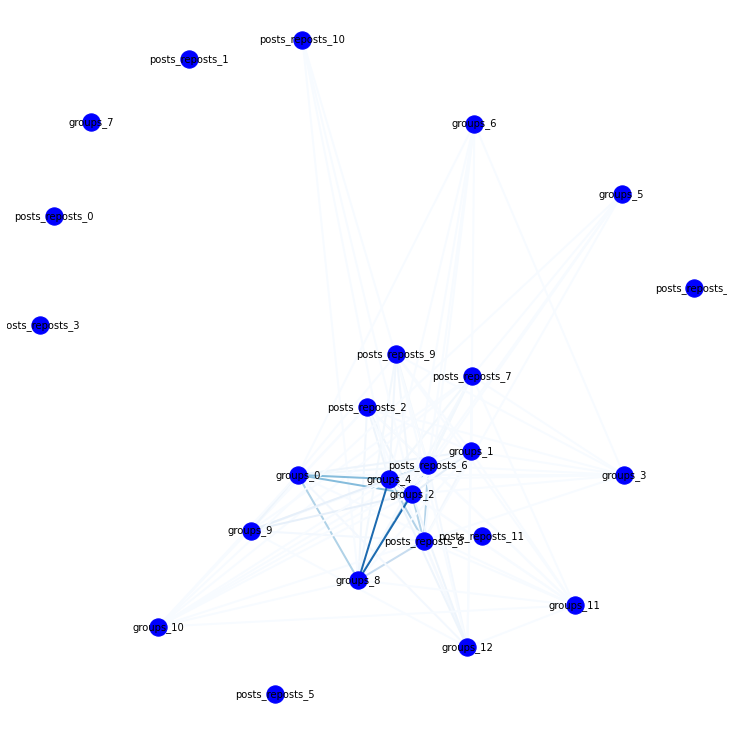

In [204]:
labels = {i: list(vertices_list)[i] for i in range(len(list(vertices_list)))}
edge_labels = {edge: str(weight) for weight, edge in zip(weights, graph_top.edges) }
show_graph(graph_top, labels, edge_labels)

# Кластеризация

In [392]:
import leidenalg
import igraph as ig
import community as community_louvain
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

KMeans

In [486]:
adj_matrix_adv

[[0.0013121729838876284,
  0.0009782681875155556,
  0.001775584310974243,
  0.0015081617056628466,
  0.0012901425119002583,
  0.0016482554586737972,
  0.006187929820250398,
  0.0016301380420810703,
  0.0019068003074724895,
  0.0017232947283258534,
  0.0016743232926441527,
  0.0018543100171342587,
  0.0005666114456869899,
  0.0005475358607161701,
  0.01015449337263896,
  0.0002812230963723872,
  0.008640353779991842,
  0.0001583435467630566,
  0.00021045889222911149,
  0.0001750506825063268,
  0.0006242548955108971,
  0.0005086856135704577,
  0.00012662205225480162,
  0.00033548890268444233,
  0.0004300514909758444],
 [0.0009782681875155556,
  0.0007304432217876718,
  0.0013226329593031456,
  0.001125137528858156,
  0.0009627195016640814,
  0.0012299777073865369,
  0.004613161123390837,
  0.0012152293972230522,
  0.0014212981876621626,
  0.0012854809177338165,
  0.001248785553161066,
  0.0013834689081087897,
  0.00042244256374427834,
  0.00040855207338343677,
  0.00757266719907576,
  0.

In [487]:
adj_matrix_adv_2

[[0.03622392833318369,
  0.0312772790938655,
  0.042137682790754444,
  0.03883505768841919,
  0.035918553867051194,
  0.04059871252483011,
  0.0786633956821748,
  0.0403749680133752,
  0.04366692463950821,
  0.04151258517998913,
  0.040918495728021975,
  0.04306170011894861,
  0.023803601527646816,
  0.023399484197652094,
  0.10076950616450872,
  0.016769707700863102,
  0.09295350332285407,
  0.012583463226117704,
  0.014507201392036697,
  0.013230672035324841,
  0.024985093466122897,
  0.022554059802404925,
  0.011252646455603305,
  0.018316356151932684,
  0.020737682873837288],
 [0.0312772790938655,
  0.027026713114762433,
  0.03636802110787918,
  0.033543069759015144,
  0.031027721502941228,
  0.035071038014101275,
  0.0679202556192984,
  0.03486014052213577,
  0.037700108589527465,
  0.0358536039713418,
  0.03533816001380188,
  0.03719501187133551,
  0.020553407594466624,
  0.02021267110956483,
  0.0870210733045494,
  0.014483549701957638,
  0.08026555545968869,
  0.010865875509036

In [488]:
adj_matrix_10

[[3483,
  0,
  3483,
  3479,
  3479,
  3478,
  3483,
  3480,
  3483,
  3479,
  3480,
  3480,
  635,
  539,
  3480,
  204,
  3241,
  4,
  59,
  4,
  1278,
  716,
  50,
  275,
  434],
 [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [3483,
  1,
  11335,
  8349,
  3479,
  8333,
  11335,
  8055,
  10168,
  10355,
  8354,
  9596,
  2101,
  1837,
  11311,
  662,
  10562,
  20,
  215,
  27,
  4042,
  2347,
  151,
  922,
  1417],
 [3479,
  0,
  8349,
  8349,
  3478,
  8325,
  8349,
  6515,
  8347,
  8326,
  8330,
  8325,
  1498,
  1303,
  8333,
  473,
  7796,
  10,
  147,
  16,
  3031,
  1684,
  107,
  658,
  1042],
 [3479,
  0,
  3479,
  3478,
  3479,
  3478,
  3479,
  3478,
  3479,
  3478,
  3478,
  3478,
  634,
  539,
  3476,
  204,
  3237,
  4,
  59,
  4,
  1277,
  715,
  50,
  275,
  434],
 [3478,
  0,
  8333,
  8325,
  3478,
  9530,
  9530,
  6500,
  9530,
  8330,
  9522,
  9521,
  1712,
  1510,
  9512,
  539,
  8900,
  12,
  170,
  22,
  3443,
  1940,
  128

In [457]:
kmeans = KMeans(n_clusters=6, random_state=2021).fit(adj_matrix_10)

In [400]:
kmeans.labels_

array([5, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 4, 2, 4, 4, 4, 3, 1,
       4, 4, 1], dtype=int32)

In [474]:
kmeans = KMeans(n_clusters=6, random_state=2021).fit(adj_matrix_adv)

In [475]:
kmeans.labels_

array([5, 5, 3, 3, 5, 3, 4, 3, 3, 3, 3, 3, 5, 5, 2, 0, 1, 0, 0, 0, 5, 5,
       0, 0, 5], dtype=int32)

In [476]:
kmeans = KMeans(n_clusters=6, random_state=2021).fit(adj_matrix_adv_2)

In [477]:
kmeans.labels_

array([0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 5, 1, 2, 4, 2, 2, 2, 5, 5,
       2, 2, 5], dtype=int32)

In [458]:
kmeans = KMeans(n_clusters=6, random_state=2021).fit(adj_matrix_adv_3)

In [439]:
kmeans.labels_

array([1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 0, 2, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

Иерархическая кластеризация на графе с 50% трешхолдом

In [484]:
agglomerative = AgglomerativeClustering(n_clusters=10).fit(adj_matrix_adv)

In [485]:
agglomerative.labels_

array([6, 0, 2, 3, 6, 3, 7, 2, 2, 2, 3, 2, 0, 0, 5, 4, 9, 1, 1, 1, 8, 0,
       1, 4, 0])

Иерархическая кластеризация на графе с 10% трешхолдом

In [267]:
agglomerative = AgglomerativeClustering(n_clusters=5).fit(adj_matrix_10)

In [268]:
agglomerative.labels_

array([0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 3, 2, 3, 3, 3, 4, 0,
       3, 3, 0])

Алгоритм Лувена (граф с 10% трешхолдом)

In [411]:
partion = community_louvain.best_partition(graph_adv)

In [412]:
partion

{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 3,
 13: 3,
 14: 1,
 15: 1,
 16: 0,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 3,
 22: 1,
 23: 1,
 24: 3}

In [ ]:
part = leidenalg.find_partition(ig.Graph(len(g), list(zip(*list(zip(*nx.to_edgelist(g)))[:2]))), leidenalg.ModularityVertexPartition);

In [292]:
labels

{0: 'posts_reposts_0',
 1: 'posts_reposts_1',
 2: 'posts_reposts_2',
 3: 'posts_reposts_3',
 4: 'posts_reposts_4',
 5: 'posts_reposts_5',
 6: 'posts_reposts_6',
 7: 'posts_reposts_7',
 8: 'posts_reposts_8',
 9: 'posts_reposts_9',
 10: 'posts_reposts_10',
 11: 'posts_reposts_11',
 12: 'groups_0',
 13: 'groups_1',
 14: 'groups_2',
 15: 'groups_3',
 16: 'groups_4',
 17: 'groups_5',
 18: 'groups_6',
 19: 'groups_7',
 20: 'groups_8',
 21: 'groups_9',
 22: 'groups_10',
 23: 'groups_11',
 24: 'groups_12'}

In [294]:
with open('adj_matrix.csv', 'a') as file:
    file.write(','+','.join(labels.values())+'\n')

for row, label in zip(adj_matrix_10, labels.values()):
    with open('adj_matrix.csv', 'a') as file:
        file.write(f'{label},{str(row)[1:-1]}\n')

In [297]:
df = pd.read_csv('interpretation/groups_topics_interpretation.csv')

In [302]:
df

,Topic,Terms,Interpretation,Description
0,1,"человек,уровень,результат,часть,случай,мечта,с...",Политическая активность,"Деятельность граждан, направленную на выбор по..."
1,2,"мочь,цена,вопрос,квартира,деньги,размер,руб,ко...",Финансовая активность,Деятельность направленная на совершение покупо...
2,3,"город,любовь,слово,счастие,душа,сердце,глаз,зе...",Семья и отношения,Ппосты связанные с радостью по случаю формиров...
3,4,"дом,место,утро,мама,вид,м,район,центр,вечер,об...",Дом,Мысли о доме и семейных ценностях.
4,5,"работа,очки,помощь,сила,тело,возможность,женщи...",Здоровый образ жизни,"Образ жизни, который направлен на сохранение з..."
5,6,"жизнь,ребенок,история,цель,лицо,школа,отношени...",Детство,О детстве (собственном и своих детей)
6,7,"день,время,праздник,победа,семья,дорогой,момен...",Праздники,"Посты про праздники, особенно связанные с Днем..."
7,8,"друг,игра,петербург,санкт,москва,подарок,г,бон...",Розыгрыши и конкурсы,"Акции, бонусные программы и скидки"
8,9,"год,мир,страна,здоровье,кожа,путь,видео,песня,...",NaN,NaN
9,10,"россия,рождение,проект,май,фото,команда,алекса...",Личности,Упоминание людей и их проффесий


In [301]:
df = pd.read_csv('interpretation/posts_reposts_topics_interpretation.csv')

Метрики

In [279]:
from networkx.algorithms.community.quality import modularity
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [284]:
# Metrics calculation function
def calculate_metrics(g, matrix, partition):
    s_score = silhouette_score(matrix, partition)
    ch_score = calinski_harabasz_score(matrix, partition)
    db_score = davies_bouldin_score(matrix, partition)
    
    communities = [[] for _ in range(len(set(partition)))]
    
    for i in range(len(partition)):
        communities[partition[i]].append(labels[i])
    
    mod = modularity(g, communities)
    return round(mod,3), round(s_score,3), round(ch_score,3), round(db_score,3)

In [285]:
calculate_metrics(graph_10, adj_matrix_10, list(partion.values()))

NotAPartition:  is not a valid partition of the graph [['groups_0', 'groups_1', 'groups_3', 'groups_5', 'groups_6', 'groups_7', 'groups_9', 'groups_10', 'groups_11', 'groups_12'], ['groups_2', 'groups_4', 'groups_8'], ['posts_reposts_0', 'posts_reposts_1', 'posts_reposts_2', 'posts_reposts_3', 'posts_reposts_4', 'posts_reposts_5', 'posts_reposts_6', 'posts_reposts_7', 'posts_reposts_8', 'posts_reposts_9', 'posts_reposts_10', 'posts_reposts_11']]